In [39]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [40]:
# This will create a list of URL to be scraped

my_url = "https://www.nass.usda.gov/Quick_Stats/Ag_Overview/stateOverview.php?state="

states_list=["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","NEW%20HAMPSHIRE","NEW%20MEXICO","New%20York",
  "North%20Carolina","North%20Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "South%20Carolina","South%20Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","WEST%20VIRGINIA","Wisconsin","Wyoming"]

year_list_num= [*range(2000,2021,1)]
years_list= [str(x) for (x) in year_list_num]

# This the list of url
url_list=[]
for state in states_list:
    my_query = my_url + state
    for year in years_list:
        new_url = my_query +'&year=' + year
        url_list.append(new_url)
       

In [42]:
def get_value(url):
    driver.get(url)
    dic={}
    Area_Operated= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[1]/tbody/tr[1]/td[2]").text
    Num_of_Operations= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[1]/tbody/tr[2]/td[2]").text
    Acres_Operated= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[1]/tbody/tr[3]/td[2]").text
    Cows_Beef= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[2]/tbody/tr[1]/td[2]").text
    Cows_Milk = driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[2]/tbody/tr[2]/td[2]").text
    Calves= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[2]/tbody/tr[3]/td[2]").text
    Milk_Per_head= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[3]/tbody/tr[1]/td[2]").text
    Milk_production= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[3]/tbody/tr[3]/td[2]").text
    
    dic={'Area_Operated':Area_Operated, 'Num_of_Operations':Num_of_Operations,
            'Acres_Operated':Acres_Operated, 'Cows_for_Milk': Cows_Milk, 'Cows_Beef': Cows_Beef,'Calves':Calves ,'Milk_Per_head':Milk_Per_head,
                 'Total_Milk_production':Milk_production }

    return dic

In [44]:

chromedriver = "C:\Program Files (x86)\Google\Chrome\Application\chromedriver.exe" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

In [45]:
driver = webdriver.Chrome(chromedriver)
# driver.get('https://www.nass.usda.gov/Quick_Stats/Ag_Overview/stateOverview.php?state=iowa&year=2017')

In [46]:
from selenium.common.exceptions import NoSuchElementException

data = []
url_list
for page in url_list:
  try:
    time.sleep(1)
    data.append(get_value(page))
    
  except NoSuchElementException:
    # Just append a None or ""
    data.append(None)

In [47]:
# removing the none values
new_data=[x for x in data if x is not None]

    


In [48]:
df= pd.DataFrame(new_data)
df.to_csv('Milk_production_2')

In [45]:
# def get_values(url):
#     driver.get(url)
#     tablelist=[]
#     x= driver.find_element_by_xpath('/html/body/div/div[1]').text
#     State= x.strip()
#     Area_Operated= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[1]/tbody/tr[1]/td[2]").text
#     Num_of_Operations= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[1]/tbody/tr[2]/td[2]").text
#     Acres_Operated= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[1]/tbody/tr[3]/td[2]").text
#     Cows_Beef= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[2]/tbody/tr[1]/td[2]").text
#     Cows_Milk = driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[2]/tbody/tr[2]/td[2]").text
#     Calves= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[2]/tbody/tr[3]/td[2]").text
#     Milk_Per_head= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[3]/tbody/tr[1]/td[2]").text
#     Milk_production= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[3]/tbody/tr[3]/td[2]").text
    
#     farms_table={'State':State,'Area_Operated':Area_Operated, 'Num_of_Operations':Num_of_Operations,
#             'Acres_Operated':Acres_Operated, 'Cows_for_Milk': Cows_Milk, 'Cows_Beef': Cows_Beef,'Calves':Calves ,'Milk_Per_head':Milk_Per_head,
#                  'Total_Milk_production':Milk_production }
#     tablelist.append(farms_table)
#     return tablelist

In [50]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set()
mdf = pd.read_csv('Milk_production_2')

In [71]:


num = 0
for i in mdf.columns:
   num += mdf[i][mdf[i]==0].count()
num

3

In [53]:
# df = df.apply(pd.to_numeric) # convert all columns of DataFrame
# df['x']=df['x'].str.replace(',','')
c= mdf.columns
mdf[c] = mdf[c].replace(',', '', regex=True)




In [54]:
mdf= mdf.apply(pd.to_numeric)

In [76]:

m = LinearRegression()
m.fit(mdf[['Area_Operated','Num_of_Operations','Acres_Operated','Cows_for_Milk','Calves', 'Milk_Per_head']],mdf['Total_Milk_production'])
m.score(mdf[['Area_Operated','Num_of_Operations','Acres_Operated','Cows_for_Milk','Calves', 'Milk_Per_head']],mdf['Total_Milk_production'])

0.6945490352716688

In [77]:
mdf.tail(100)

,Unnamed: 0,Area_Operated,Num_of_Operations,Acres_Operated,Cows_for_Milk,Cows_Beef,Calves,Milk_Per_head,Total_Milk_production
883,883,177,47000,8300000,103000,727000,1660000,16990,1784000000
884,884,175,46800,8200000,100000,710000,1620000,17363,1771000000
885,885,171,47400,8100000,98000,692000,1570000,17530,1753000000
886,886,171,46900,8000000,97000,643000,1470000,17612,1726000000
887,887,173,46900,8100000,95000,665000,1550000,18083,1736000000
...,...,...,...,...,...,...,...,...,...
978,978,2442,12000,29300000,6000,714000,1330000,23300,139800000
979,979,2437,11900,29000000,6000,714000,1320000,23033,138200000
980,980,2437,11900,29000000,6000,714000,1300000,23700,142200000
981,981,2417,12000,29000000,6000,724000,1320000,24433,146600000


In [62]:
mdf.corr()

,Unnamed: 0,Area_Operated,Num_of_Operations,Acres_Operated,Cows_for_Milk,Cows_Beef,Calves,Milk_Per_head,Total_Milk_production
Unnamed: 0,1.000000,0.125354,0.141006,0.162887,0.030820,0.160596,0.124165,0.128162,0.229257
Area_Operated,0.125354,1.000000,-0.202786,0.410104,-0.122789,0.166102,0.091206,0.225085,-0.074024
Num_of_Operations,0.141006,-0.202786,1.000000,0.704495,0.317480,0.779665,0.819213,-0.027507,0.307433
Acres_Operated,0.162887,0.410104,0.704495,1.000000,0.125443,0.880923,0.866962,0.179112,0.167529
Cows_for_Milk,0.030820,-0.122789,0.317480,0.125443,1.000000,0.006197,0.329790,-0.291292,0.584557
Cows_Beef,0.160596,0.166102,0.779665,0.880923,0.006197,1.000000,0.910652,0.054351,0.035786
Calves,0.124165,0.091206,0.819213,0.866962,0.329790,0.910652,1.000000,0.011289,0.245393
Milk_Per_head,0.128162,0.225085,-0.027507,0.179112,-0.291292,0.054351,0.011289,1.000000,0.373763
Total_Milk_production,0.229257,-0.074024,0.307433,0.167529,0.584557,0.035786,0.245393,0.373763,1.000000


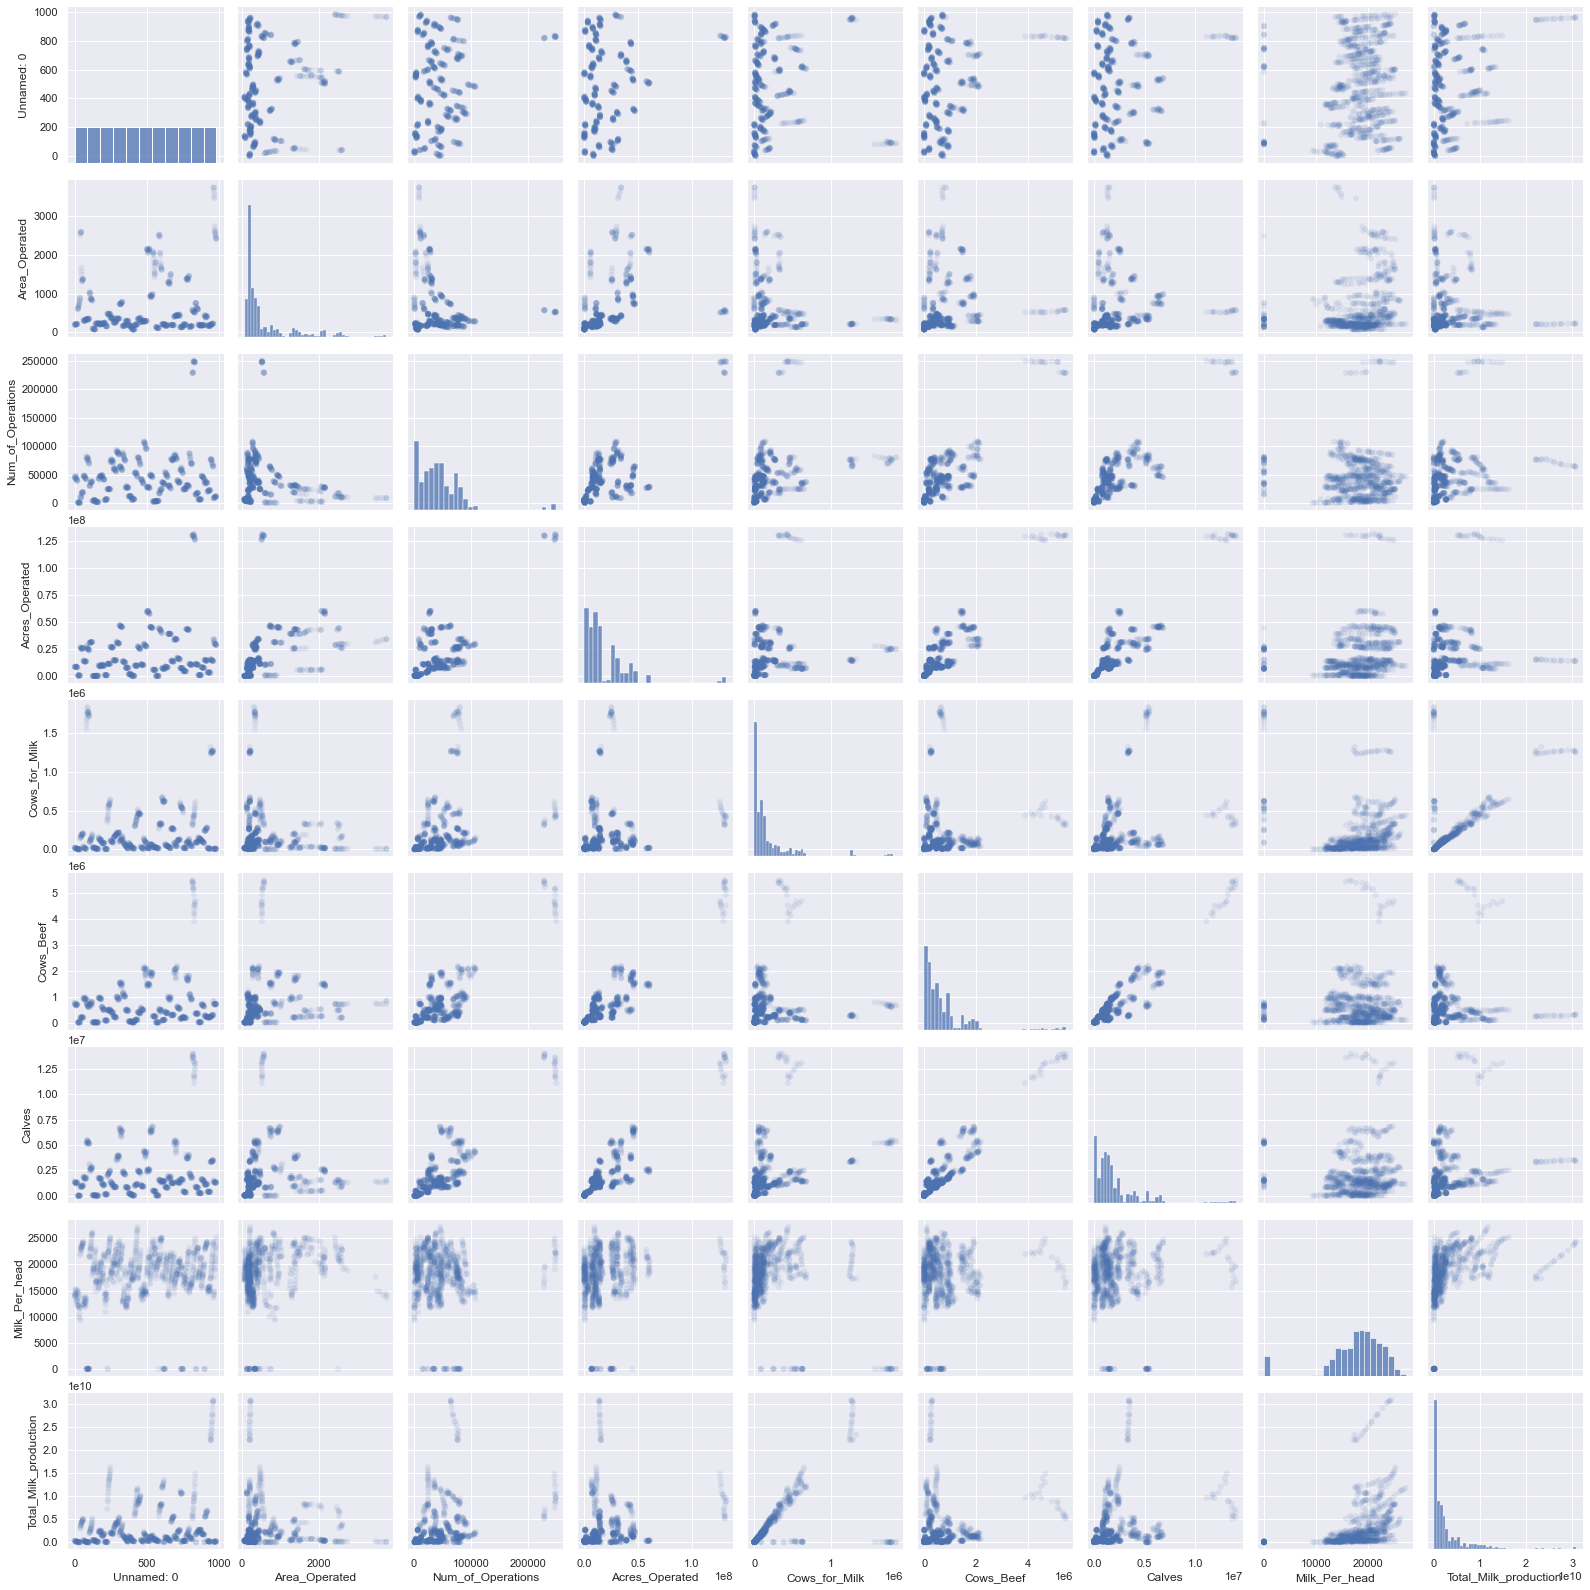

In [63]:
sns.pairplot(mdf[:1000], plot_kws=dict(alpha=.1, edgecolor='none'))